# 1. Introduction #

## 1.1 Project Summary ##

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines. 

##  1.2 Objective ##
The objective is to tackle the curse of dimensionality and reduce the time cars spend on test bench.

## 1.3 Data Dictionary ##

The dataset contains variables that are anonymus each representing a custome feature in a Mercedes car. The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

Variables with letters are categorical. Variables with 0/1 are binary values.

* train.csv - the training set
* test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file
* sample_submission.csv - a sample submission file in the correct format


## 1.4 Steps ##
We will be performing various steps to achieve the objective

* Loading data
* Exploratory data analysis
* Data wrangling
* Modeling and Predicting
* Formatting output


# 2. Loading data #

## 2.1 Loading libraries ##

In [358]:
""" importing required packages """
%matplotlib inline

""" packages for data manipulation, munging and merging """
import pandas as pd
import numpy as np

""" packages for visualiztion and exploratory analysis """
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

""" packages for running machine learning algorithms """
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.feature_selection import VarianceThreshold

## Loading data ##

We will be loading training and test datasets using pandas read_csv function.

In [359]:
""" file paths """
train_file = 'train.csv'
test_file = 'test.csv'

""" function to read training data into pandas dataframe """
def read_training_data(filepath):
    train_df = pd.read_csv(filepath)
    return train_df

""" function to read test data into pandas dataframe """
def read_test_data(filepath):
    test_df = pd.read_csv(filepath)
    return test_df

""" calling function to read training data into a dataframe """
train_df = read_training_data(train_file)
test_df = read_test_data(test_file)

In [360]:
def data_summary(df):
    print(df.shape)
    print(df.info())   
    print(df.head(5))

""" calling functions to print summary statistics of training data """
data_summary(train_df)
data_summary(test_df)

(4209, 378)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None
   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...   X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...      0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...      1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...      0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...      0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]
(4209, 377)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, 

In the training dataset, there are 4209 rows with 378 columns.

* ground truth varible y is of type float
* X0,X1,X2,X3,X4,X5,X6,X8 are of type object
* rest of the columns are int type

We will convert [X0,X1,X2,X3,X4,X5,X6,X8] to categorical types and plot to see the distribution of values.


# Imputing missing values #

We will check if there are any missing values in the training and testing datasets. If there are any we will use suitable methods to impute missing values.

In [361]:
def check_missing_values(df):
    if df.isnull().any().any():
        print("There are missing values in the dataframe")
    else:
        print("There are no missing values in the dataframe")
        
""" calling functions to check missing values on training and test datasets """
check_missing_values(train_df)
check_missing_values(test_df)

There are no missing values in the dataframe
There are no missing values in the dataframe


Looks like there are no missing values in the dataframe.

In [362]:
def initial_datatype_conversion(df):
    cols = ['X0','X1','X2','X3','X4','X5','X6','X8']
    for col in cols:
        df[col] = df[col].astype('category')
    return df

""" datatype conversion """
ret_train_df = initial_datatype_conversion(train_df)
ret_test_df = initial_datatype_conversion(test_df)

""" combining categorical attributes from training and test datasets """
train_df_cat = ret_train_df.loc[:,['X0','X1','X2','X3','X4','X5','X6','X8']]
test_df_cat = ret_test_df.loc[:,['X0','X1','X2','X3','X4','X5','X6','X8']]
train_df_cat = train_df_cat.add_prefix('train_')
test_df_cat = test_df_cat.add_prefix('test_')
combined = train_df_cat.append(test_df_cat, ignore_index=True)

# Exploratory Data Analysis #

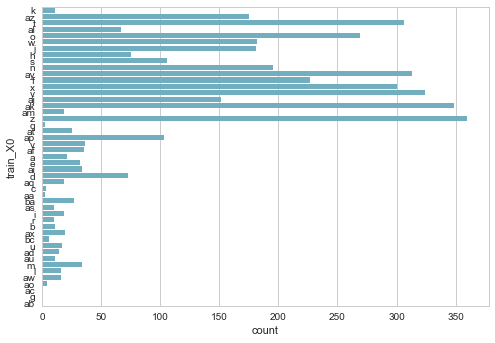

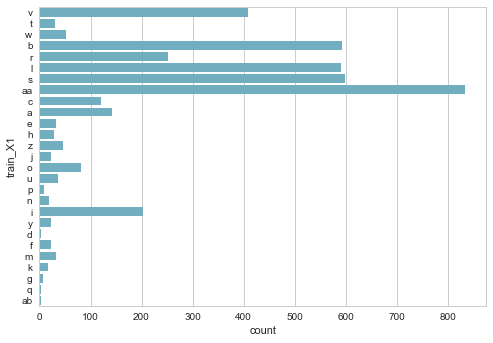

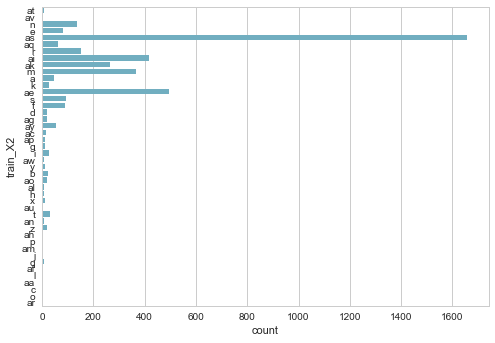

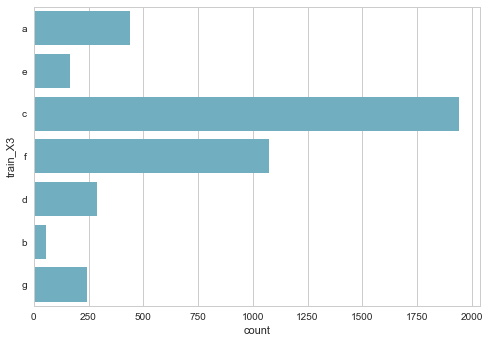

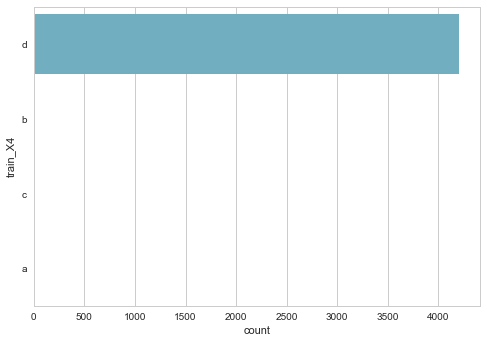

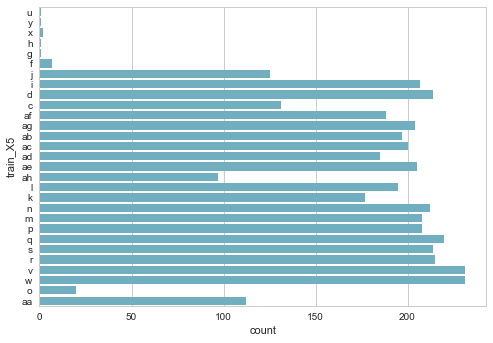

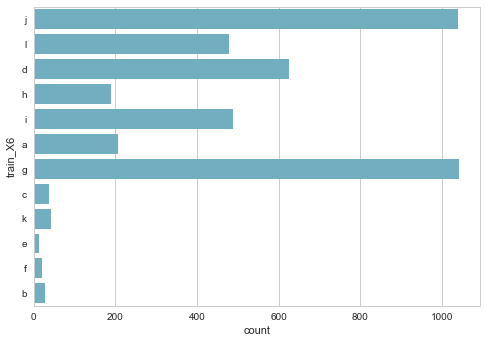

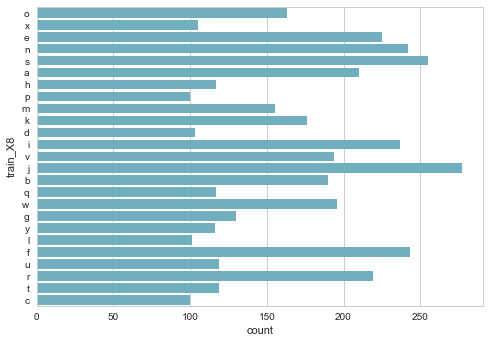

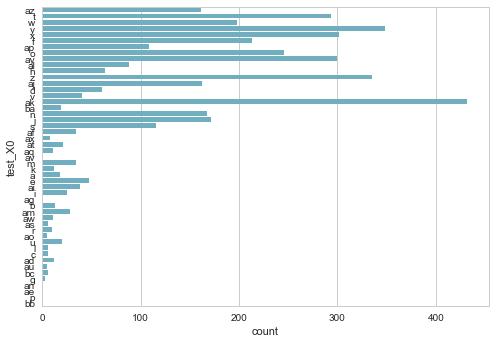

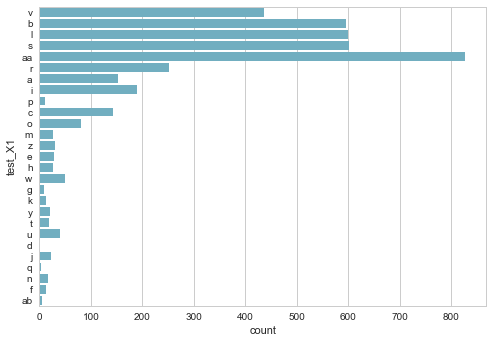

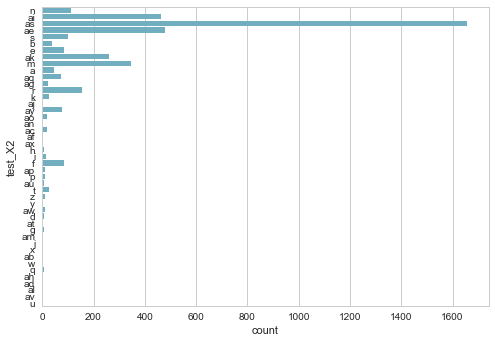

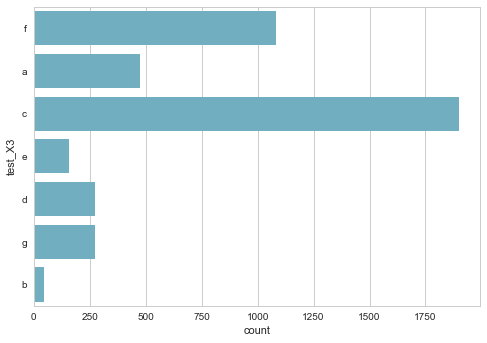

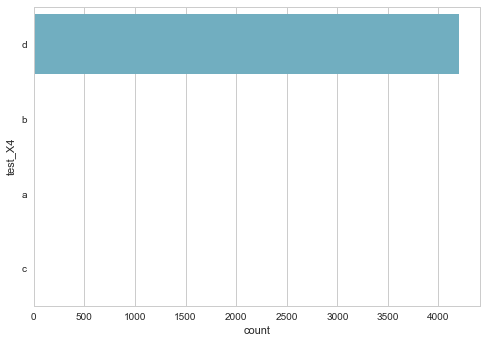

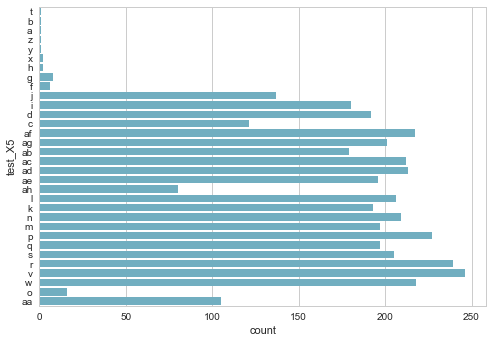

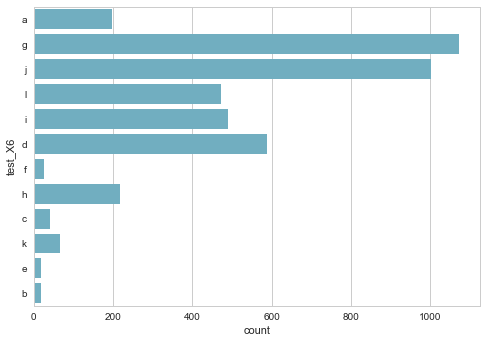

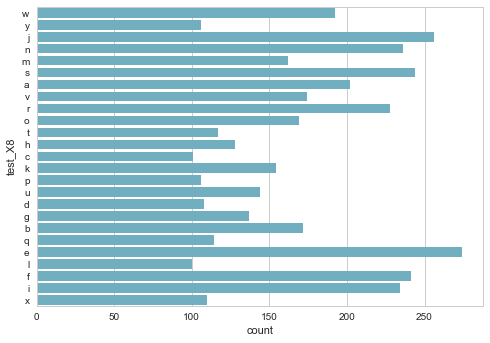

In [363]:
def visualize_categories(df, **kwargs):
    row = kwargs.get('row',None)
    col = kwargs.get('col',None)
    hue = kwargs.get('hue',None)
    
    df_types = ['train_','test_']
    y_val = ['X0','X1','X2','X3','X4','X5','X6','X8']
    for df_type in df_types:
        for val in y_val:
            yval = df_type + val
            plt.figure()
            sns.countplot(y=yval, data=df, color="c");
            plt.show()

visualize_categories(combined)

The plots reveal that values among X0, X1, X2, X5, X6 and X8 are fairly distributed, where as values in X3 is moderately distributed. X4 seems to have only one value 'd'. If X4 is part of the training features dataset, the model outcomes may be skewed. In order to avoid that, we will de dropping it from the training and test datasets that will be passed to modeling step.

The character values in X0, X1, X2, X5, X6 and X8 are converted to numerical values so that we can use them in modeling steps.

In [364]:
def value_assignment(df):
    
    unique_values = np.unique(df[['X0', 'X1', 'X2','X3','X4','X5','X6','X8']].values)
    dict_vals = {'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,
                 'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25,'aa':26,'ab':27,
                 'ac':28,'ad':29,'ae':30,'af':31,'ag':32,'ah':33,'ai':34,'aj':35,'ak':36,'al':37,'am':38,'an':39,
                'ao':40,'ap':41,'aq':42,'ar':43,'as':44,'at':45,'au':46,'av':47,'aw':'48','ax':49,'ay':50,'az':51,
                 'ba':52,'bb':53,'bc':54}
    cols = ['X0', 'X1', 'X2','X3','X4','X5','X6','X8']
    for col in cols:
        df[col] = df[col].astype('object')
        df[col].replace(dict_vals, inplace=True)
        #df[col] = df[col].astype('int64')
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
    
    return df

""" calling value_assignment function to assign numerical values to categorical attributes """
train_df_prep = value_assignment(ret_train_df)
test_df_prep = value_assignment(ret_test_df)

# Modeling and Prediction #

In [365]:
""" data preparation for modeling and prediction steps """
train_X = train_df_prep.drop(['ID','y','X4'], axis=1)
train_Y = train_df_prep['y']
train_Y = train_Y.values
test_X = test_df_prep.drop(['ID','X4'],axis=1)

## Model Functions ##

### Support Vector Regressor ###

In [366]:
def perform_svc(train_X, train_Y, test_X):
    svr_clf = SVR()
    svr_clf.fit(X=train_X, y=train_Y)
    pred_Y = svr_clf.predict(test_X)
    accuracy = round(svr_clf.score(train_X, train_Y) * 100, 2)
    returnval = {'model':'SVR', 'accuracy':accuracy}
    return returnval

### Random Forest Regressor ###

In [367]:
def perform_rfc(df_X, df_Y, test_df_X):

    rfr_clf = RandomForestRegressor(n_estimators = 100 ,oob_score=True, max_features="auto")
    rfr_clf.fit(df_X, df_Y)
    pred_Y = rfr_clf.predict(test_df_X)
    accuracy = round(rfr_clf.score(df_X, df_Y) * 100, 2)
    returnval = {'model':'RandomForestRegressor','accuracy':accuracy}
    return returnval

### K-Nearest Neighbors Regressor ###

In [368]:
def perform_knn(df_X, df_Y, test_df_X):
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(df_X, df_Y)
    pred_Y = knn.predict(test_df_X)
    accuracy = round(knn.score(df_X, df_Y) *100,2)
    returnval = {'model':'KNeighborsRegressor','accuracy':accuracy}
    return returnval

### Naive Bayes ###

In [369]:
def perform_gnb(df_X, df_Y, test_df_X):
    gnb = GaussianNB()
    gnb.fit(df_X, df_Y)
    pred_Y = gnb.predict(test_df_X)
    accuracy = round(gnb.score(df_X, df_Y)*100,2)
    returnval = {'model':'GaussianNB','accuracy':accuracy}
    return returnval

### XGBoost ###

In [370]:
def perform_xgboost(df_X, df_Y, test_df_X):
    model = XGBClassifier()
    model.fit(df_X, df_Y)
    pred_Y = model.predict(test_df_X)
    accuracy = round(model.score(df_X, df_Y)*100,2)
    returnval = {'model':'XGBoost','accuracy':accuracy}
    return returnval

## Dimensionality Reduction Techniques ##

### Principal component analysis (PCA) ###

Linear dimensionality reduction using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space. There are 4 types of SVD solvers

* auto : the solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards

* full: run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing

* arpack: run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. It requires strictly 0 < n_components < X.shape[1]

* randomized: run randomized SVD by the method of Halko et al.

We will run principal component analysis for multiple n_component values to see how the models get affected.

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [371]:
def perform_pca(train_X, train_Y, test_X):
    n_components = [10]
    #solvers = ['auto']
    pca_model_accuracies = pd.DataFrame()
    pca = PCA(n_components = 10,svd_solver='auto')
    pca.fit(train_X)
    train_X_pca = pca.transform(train_X)
    test_X_pca = pca.transform(test_X)

    svc_acc_val = perform_svc(train_X_pca, train_Y, test_X_pca)

    rfc_acc_val = perform_rfc(train_X_pca, train_Y, test_X_pca)

    knn_acc_val = perform_knn(train_X_pca, train_Y, test_X_pca)

    pca_model_accuracies = pca_model_accuracies.append([svc_acc_val,rfc_acc_val,knn_acc_val])
    cols = list(pca_model_accuracies.columns.values)
    cols = cols[-1:] + cols[:-1]
    pca_model_accuracies = pca_model_accuracies[cols]
    pca_model_accuracies = pca_model_accuracies.sort_values(by='accuracy')
    print(pca_model_accuracies)

""" calling function to perform principal component analysis """
perform_pca(train_X, train_Y, test_X)

                   model  accuracy
0                    SVR     19.87
2    KNeighborsRegressor     53.76
1  RandomForestRegressor     90.37


### Feature Agglomeration ###

Similar to AgglomerativeClustering, but recursively merges features instead of samples.

Default connectivity value is None, i.e, the hierarchical clustering algorithm is used which is unstructured. 

In [372]:
def perform_feature_agglomeration(train_X, train_Y, test_X):
    n_clusters = [32]
    fagg_model_accuracies = pd.DataFrame()
    for n_cluster in n_clusters:
        agglo = FeatureAgglomeration(connectivity=None, n_clusters=n_cluster)
        agglo.fit(train_X)
        train_X_reduced = agglo.transform(train_X)
        test_X_reduced = agglo.transform(test_X)
        
        svc_acc_val = perform_svc(train_X_reduced, train_Y, test_X_reduced)
        svc_acc_val['no of clusters'] = n_cluster
                
        rfc_acc_val = perform_rfc(train_X_reduced, train_Y, test_X_reduced)
        rfc_acc_val['no of clusters'] = n_cluster
                
        knn_acc_val = perform_knn(train_X_reduced, train_Y, test_X_reduced)
        knn_acc_val['no of clusters'] = n_cluster
        
        fagg_model_accuracies = fagg_model_accuracies.append([svc_acc_val,rfc_acc_val,knn_acc_val])
        cols = list(fagg_model_accuracies.columns.values)
        cols = cols[-1:] + cols[:-1]
        fagg_model_accuracies = fagg_model_accuracies[cols]
        fagg_model_accuracies = fagg_model_accuracies.sort_values(by='accuracy')
    print(fagg_model_accuracies)

""" calling function to perform feature agglomeration """
perform_feature_agglomeration(train_X, train_Y, test_X)

   no of clusters  accuracy                  model
0              32     30.20                    SVR
2              32     52.85    KNeighborsRegressor
1              32     90.97  RandomForestRegressor


### Variance Threshold ###

In [373]:
def perform_variance_threshold(train_X, train_Y, test_X):
    vt_model_accuracies = pd.DataFrame()
    selector = VarianceThreshold(threshold=0.03)
    selector.fit(train_X)
    train_X_reduced = selector.transform(train_X)
    test_X_reduced = selector.transform(test_X)
    
    svc_acc_val = perform_svc(train_X_reduced, train_Y, test_X_reduced)
                
    rfc_acc_val = perform_rfc(train_X_reduced, train_Y, test_X_reduced)
                
    knn_acc_val = perform_knn(train_X_reduced, train_Y, test_X_reduced)
                
    vt_model_accuracies = vt_model_accuracies.append([svc_acc_val,rfc_acc_val,knn_acc_val])
    cols = list(vt_model_accuracies.columns.values)
    cols = cols[-1:] + cols[:-1]
    vt_model_accuracies = vt_model_accuracies[cols]
    vt_model_accuracies = vt_model_accuracies.sort_values(by='accuracy')
    print(vt_model_accuracies)

""" calling function to perform variance threshold analysis """
perform_variance_threshold(train_X, train_Y, test_X)

                   model  accuracy
0                    SVR     37.36
2    KNeighborsRegressor     55.80
1  RandomForestRegressor     91.07


#  Output #
* Model accuracy rates based on PCA show that values do not differ much between full, arpack and random solver types. Among the models used with reduced dimensionality datasets from PCA, random forest classifier has the highest accuracy rate.
* Model accuracy rates based on Feature Agglomeration show gradual increase in values as n_clusters value increases. Among the models Random Forest Classifier generates highest accuracy rate of 93.61 for n_clusters = 32. 
* Model accuracy rates based on Variance Threshold with threshold = 0.03 returns highest accuracy rate for random forest classifier which is 93.61. 


In [374]:
def write_to_csv(train_X, train_Y, test_X, test_df):
    
    agglo = FeatureAgglomeration(connectivity=None, n_clusters=32)
    agglo.fit(train_X)
    train_X_reduced = agglo.transform(train_X)
    test_X_reduced = agglo.transform(test_X)
    
    rfr_clf = RandomForestRegressor(n_estimators = 100 ,oob_score=True, max_features=None)
    rfr_clf.fit(train_X_reduced, train_Y)
    pred_Y = rfr_clf.predict(test_X_reduced)
    
    pred_Y_list = pred_Y.tolist()
    test_X['y'] = pred_Y
    test_X['ID'] = test_df['ID']
    final_df = test_X[['ID','y']]
    final_df.to_csv('submission_1.csv',sep=',',index=False)

write_to_csv(train_X, train_Y, test_X, test_df_prep)


# Summary #
-------

This is my first competition besides titanic machine learning exercise. I had a great time working on this competition. Since I am still trying to get a grip of machine learning concepts and techniques, I request fellow kagglers to provide constructive feedback to improve myself.

## References ##
* [Unsupervised learning](http://scikit-learn.org/stable/modules/unsupervised_reduction.html)
* [Feature Agglomeration](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration)
* [Principal component analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
* [Random Projection](http://scikit-learn.org/stable/modules/random_projection.html#random-projection)
* [Variance Threshold](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold)
* [Dimensionality Reduction Techniques](https://www.knime.org/blog/seven-techniques-for-data-dimensionality-reduction)